In [ ]:
pip install python-binance & pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 2.6 MB/s 
     |████████████████████████████████| 288 kB 11.9 MB/s 
     |████████████████████████████████| 112 kB 46.8 MB/s 
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29104 sha256=5a4ede4278842b4817b52558f465bfe9fee15d249616f77f4a09f3b456abe9a3
  Stored in directory: /root/.cache/pip/wheels/31/31/f1/f2ff471bbc5b84a4b973698ceecdd453ae043971791adc3431
Successfully built ta
     |████████████████████████████████| 749 kB 32.8 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2022.6.2
    Uninstalling regex-2022.6.2:
      Successfully uninstalled regex-2022.6.2


In [2]:
# -- Import --
import pandas as pd
from binance.client import Client

import ta
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [6]:
pairName = "ETHBTC"

print(f"We will present the dataframe of {pairName} to csv file and a graph of the corresponding RSI and volume")

rsi_param = input("Please enter the RSI parameter (recommended 14):") 
lower_treshold = input("Please enter the lower treshold for RSI included in [0;100]:") 
upper_treshold = input("Please enter the upper treshold for RSI included in [0;100]:") 


startDate = None
while(startDate==None):
    try :
        startDate = datetime.strptime(input("Please enter the start date (format: yyyy/mm/dd):"), '%Y/%m/%d')
        print(f'You entered {startDate}')
        break
    except :
        print("Syntax error, please retry.")
 
endDate = None
while(endDate==None):
    try :
        endDate = datetime.strptime(input("Please enter the end date (format: yyyy/mm/dd):"), '%Y/%m/%d')
        print(f'You entered {endDate}')
        break
    except :
        print("Syntax error, please retry.")

timeframe = None
while(timeframe==None):
    time_step = input("Please select a timeframe: weekly/daily/hourly:") 
    if time_step in ["weekly", "daily", "hourly"] :
        timeframe=time_step
        print(f'You entered {time_step}') 
        break
    else :
        print("Syntax error, please retry.")

print(f'We are downloading data of {pairName} from {startDate} to {endDate} in {time_step} timeframe')

We will present the dataframe of ETHBTC to csv file and a graph of the corresponding RSI and volume
Please enter the RSI parameter (recommended 14):14
Please enter the lower treshold for RSI included in [0;100]:30
Please enter the upper treshold for RSI included in [0;100]:70
Please enter the start date (format: yyyy/mm/dd):32313
Syntax error, please retry.
Please enter the start date (format: yyyy/mm/dd):2022/01/01
You entered 2022-01-01 00:00:00
Please enter the end date (format: yyyy/mm/dd):2022/09/01
You entered 2022-09-01 00:00:00
Please select a timeframe: weekly/daily/hourly:daily
You entered daily
We are downloading data of ETHBTC from 2022-01-01 00:00:00 to 2022-09-01 00:00:00 in daily timeframe


In [14]:
if time_step == 'weekly':
  timeInterval = Client.KLINE_INTERVAL_1WEEK
elif time_step == 'daily':
  timeInterval = Client.KLINE_INTERVAL_1DAY
elif time_step == 'hourly':
  timeInterval = Client.KLINE_INTERVAL_1HOUR

In [15]:
# -- Define Binance Client --
client = Client()

# -- Load all price data from binance API --
startDate = str(startDate)
endDate = str(endDate)
timeInterval = str(timeInterval)

klinesT = client.get_historical_klines(pairName, timeInterval, startDate, endDate)


# -- Define the dataset --
df = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
df['close'] = pd.to_numeric(df['close'])
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])
df['open'] = pd.to_numeric(df['open'])
df['volume'] = pd.to_numeric(df['volume'])

# -- Set the date to index --
df = df.set_index(df['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')
del df['timestamp']

print("Data loaded 100%")

Data loaded 100%


In [1]:
# -- Drop all columns we do not need --
df.drop(df.columns.difference(['open','high','low','close','volume']), 1, inplace=True)


NameError: name 'df' is not defined

In [17]:
# -- Define indicators --

df['RSI'] = ta.momentum.rsi(close = df['close'], window = int(rsi_param))
df['MFI'] = ta.volume.money_flow_index(high = df['high'], low = df['high'], close = df['close'], volume = df['volume'], window = 14)

df['RSI'] = pd.to_numeric(df['RSI'])
df['MFI'] = pd.to_numeric(df['MFI'])

In [18]:
df.to_csv('data_frame.csv') #create the dataframe into a csv file (for .py file)
#print(df)

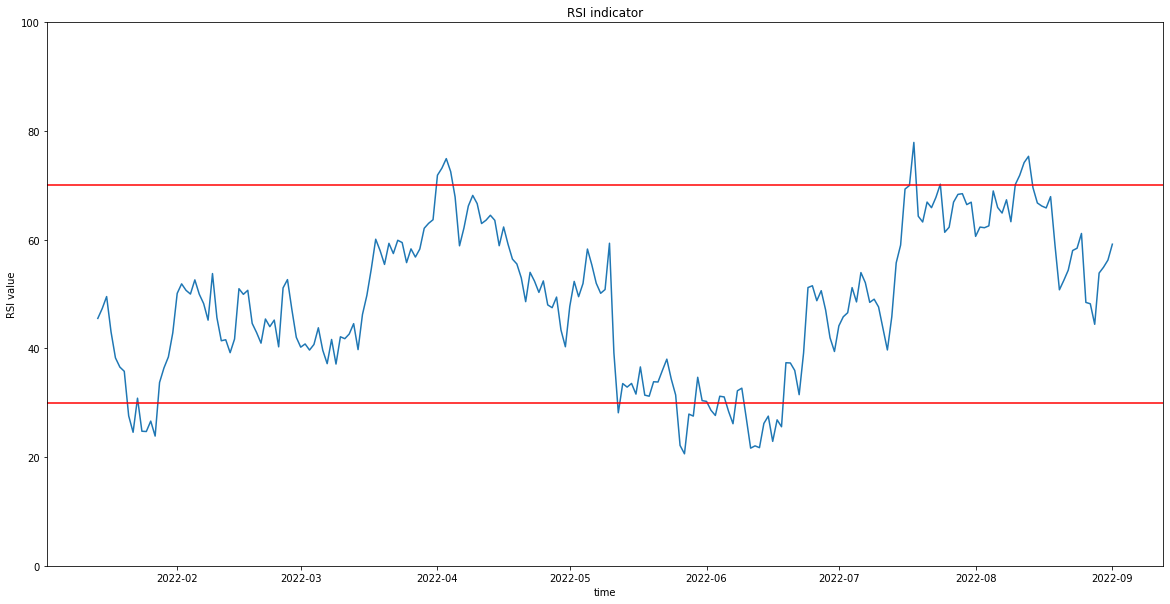

In [19]:
# -- RSI plot--

plot1 = plt.figure(figsize=(20,10))
plt.plot(df['RSI'])

plt.title('RSI indicator')
plt.xlabel('time')
plt.ylabel('RSI value')
#plt.xlim(start_range, end_range)
plt.ylim(0, 100)

plt.axhline(int(lower_treshold), color='r') # horizontal
plt.axhline(int(upper_treshold), color='r') # horizontal

plt.show()

In [20]:
plot1.savefig("rsi_graph.pdf") #Print the plot into a pdf (python file)

In [21]:
mean_volume = df['volume'].mean() #correspond to the ADTV
std_volume = df['volume'].std()

mean_rsi = df['RSI'].mean()
std_rsi = df['RSI'].std()

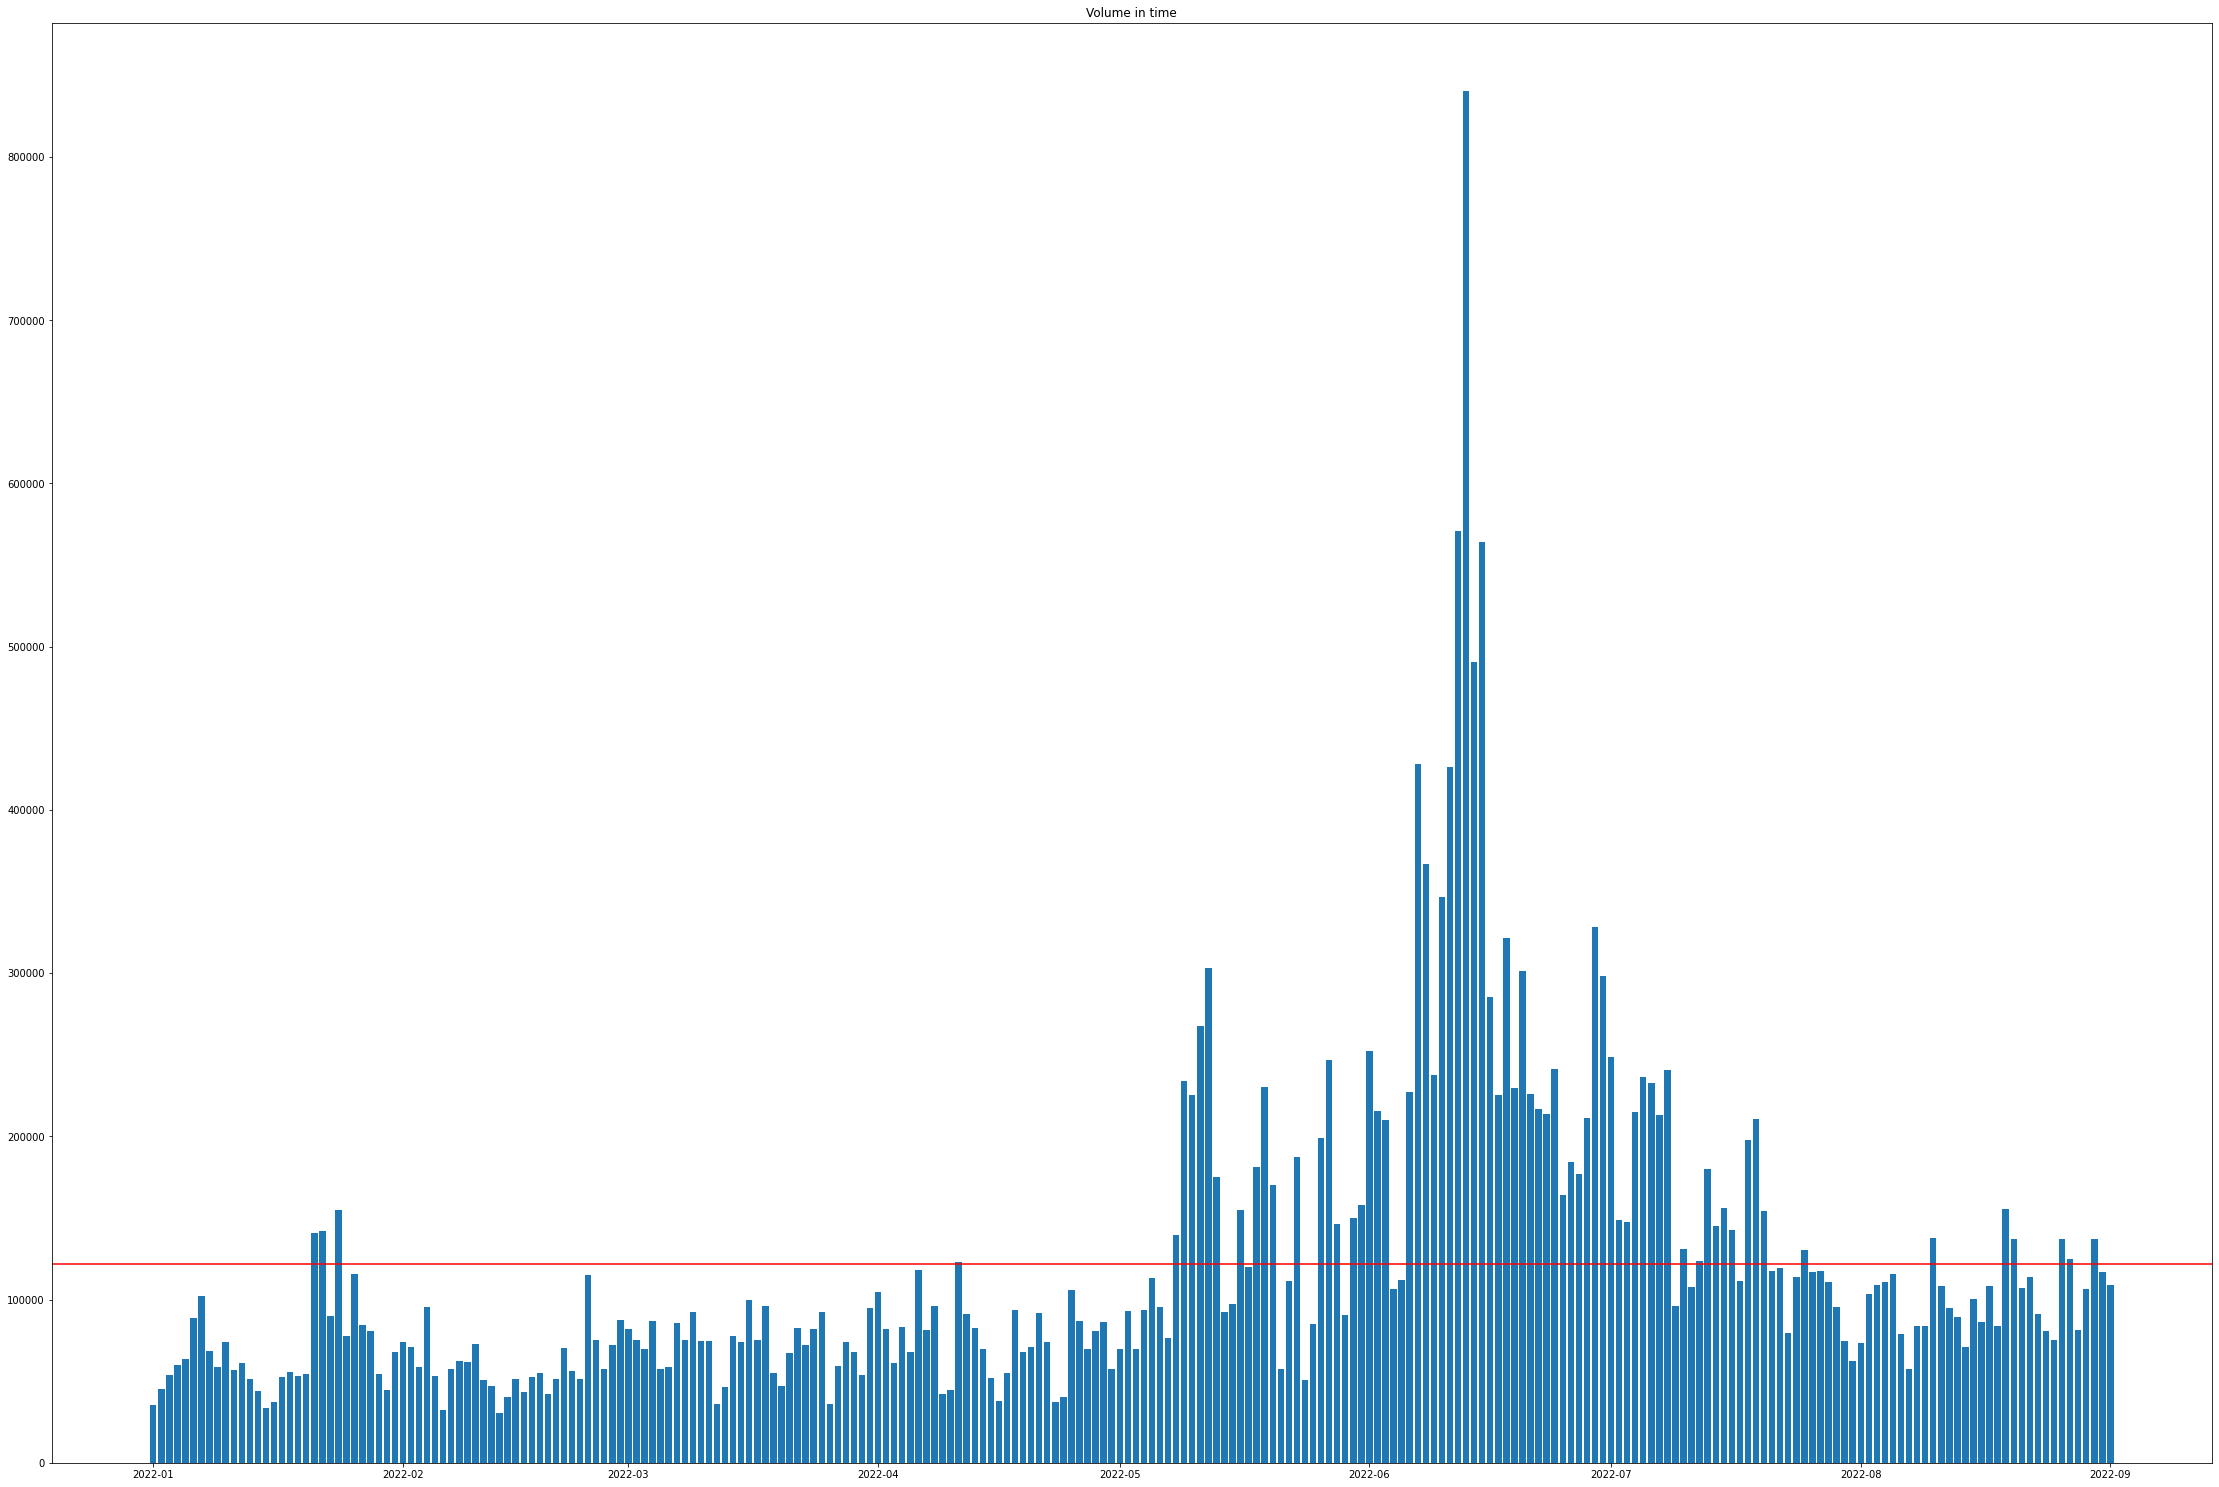

In [22]:
# -- Volume plot --

plot2 = plt.figure()
ax = plot2.add_axes([0,0,5,5])
ax.bar(df.index ,df['volume'])
plt.axhline(mean_volume, label = 'average volume', color='r') # horizontal
plt.title('Volume in time')

plot2.savefig("volume_histogram.pdf",  bbox_inches='tight')
plt.show()

In [23]:
upper_treshold = int(upper_treshold)
lower_treshold = int(lower_treshold)

In [24]:
count_low = 0
count_high = 0

for index, row in df.iterrows():

  if row['RSI'] < lower_treshold:
    count_low += 1
  elif row['RSI'] > upper_treshold:
    count_high += 1

percent_low = round((count_low / len(df)) , 5)
percent_high = round((count_high / len(df)), 5)

In [25]:
print(f'The RSI is above {upper_treshold}, {count_high} times and below the {lower_treshold}, {count_low} times.')
print(f'This correspond respectively to {percent_high}% and {percent_low}% of times.')

The RSI is above 70, 10 times and below the 30, 24 times.
This correspond respectively to 0.04098% and 0.09836% of times.


In [26]:
# -- Buy/Short opportunities --

buy_opportunities = 0
short_opportunities = 0

for index, row in df.iterrows():

  if row['RSI'] < lower_treshold and row['volume'] > mean_volume + std_volume:
    buy_opportunities += 1
  elif row['RSI'] > upper_treshold and row['volume'] > mean_volume + std_volume:
    short_opportunities += 1


In [27]:
#print(buy_opportunities, short_opportunities)
print(f'Combining high moment of volume and RSI overbuy/sold, We had {buy_opportunities} opportunities to LONG the market and {short_opportunities} opportunities to SHORT the market from {startDate} and {endDate} with {timeInterval} time frame.')

Combining high moment of volume and RSI overbuy/sold, We had 13 opportunities to LONG the market and 0 opportunities to SHORT the market from 2022-01-01 00:00:00 and 2022-09-01 00:00:00 with 1d time frame.
